# Advanced FIS configuration

This document summarizes the advanced configuration options available for Fuzzy Inference Systems.

For a general background on the components of Fuzzy Inference Systems, you can check out MatWorks's documentation at https://www.mathworks.com/help/fuzzy/fuzzy-inference-process.html

In [1]:
import zadeh
import matplotlib.pyplot as plt

## Logical operators

The current version of zadeh supports only the most common definitions for the logical operators. In terms of membership funtion values:

| Python notation | Logical notation | Interpretation  |
|-----------------|------------------|-----------------|
| ~X              | NOT X            | x: 1-x          |
| X\|Y            | X OR Y           | x, y: max(x, y) |
| X&Y             | X AND Y          | x, y: min(x, y) |

## Implication

The current version of zadeh supports only the most common definitions for the logical implication output. In terms of membership funtion values:

| Python notation | Logical notation | Interpretation  |
|-----------------|------------------|-----------------|
| X >> Y          | X -> Y           | x, y: min(x, y) |

## Aggregation

The current version of zadeh supports only the most common aggregation method for multiple rules, which the usage of the maximum function

| Python notation | Logical notation | Interpretation       |
|-----------------|------------------|----------------------|
| [X, Y, ...]     | {X, Y, ...}      | x, y, ...: max(x, y) |

## Defuzzification 

Defuzzification is the last stage of the Fuzzy Inference System, where the fuzzy output is mapped into a crisp output using one of the available procedures. Available options are:

- **centroid**: Analog to the center of mass.
- **bisector**: Value separating two portions of equal area under the membership function.
- **mom** (middle of maximum): Middle (median) of the set of values whose images are the maximum of the membership function.
- **som** (smaller of maximum): Smaller (min) of the set of values whose images are the maximum of the membership function.
- **mom** (middle of maximum): Largest (max) of the set of values whose images are the maximum of the membership function.


The following plot illustrates the different methods using a custom Fuzzy Set, matching the one from 
https://www.mathworks.com/help/fuzzy/defuzzification-methods.html

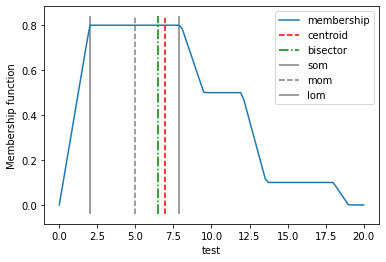

In [2]:
test = zadeh.FuzzyVariable(
    zadeh.FloatDomain("test", 0, 20, 100),
    {
        "membership": 0.8 * zadeh.TrapezoidalFuzzySet(0, 2, 8, 12)
        | 0.5 * zadeh.TrapezoidalFuzzySet(5, 7, 12, 14)
        | 0.1 * zadeh.TrapezoidalFuzzySet(12, 13, 18, 19),
    },
)
test.plot()
lims=plt.ylim()
plt.vlines(test.domain.centroid(test.values["membership"]), *lims, color="r", ls="--", label="centroid")
plt.vlines(test.domain.bisector(test.values["membership"]), *lims, color="g", ls="-.", label="bisector")
plt.vlines(test.domain.som(test.values["membership"]), *lims, color="gray", ls="-", label="som")
plt.vlines(test.domain.mom(test.values["membership"]), *lims, color="gray", ls="--", label="mom")
plt.vlines(test.domain.lom(test.values["membership"]), *lims, color="gray", ls="-", label="lom")
plt.legend()

plt.show()

To set any of this methods in a FIS, just use the defuzzification kwargs in its construction.